<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/minimal_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Minimal CNN, uma convolução com um só filtro...para observarmos os componentes

In [1]:
!pip install tensorflow-gpu==2.0.0 

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 450kB 42.8MB/s 
     |████████████████████████████████| 3.8MB 52.2MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.0.0'

In [3]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


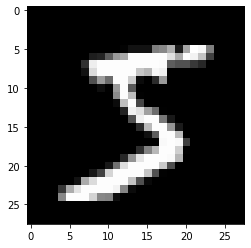

In [4]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.gray()
plt.imshow(X_train[0])

In [5]:
#check image shape
X_train[0].shape

(28, 28)

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [7]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:

#create model
model = tf.keras.Sequential()
#add model layers
model.add(tf.keras.layers.Convolution2D(1,kernel_size=3, activation='relu', input_shape=(28,28,1),use_bias=False))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         9         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 169)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1700      
Total params: 1,709
Trainable params: 1,709
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#train the model
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 13s 210us/sample - loss: 1.5247 - accuracy: 0.6322 - val_loss: 0.6316 - val_accuracy: 0.8115
Epoch 2/3
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4900 - accuracy: 0.8537 - val_loss: 0.3504 - val_accuracy: 0.8950
Epoch 3/3
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3402 - accuracy: 0.8986 - val_loss: 0.3063 - val_accuracy: 0.9158


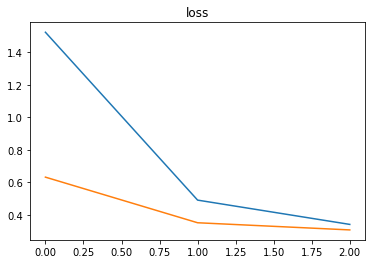

In [12]:
import matplotlib.pyplot as plt
plt.title('loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

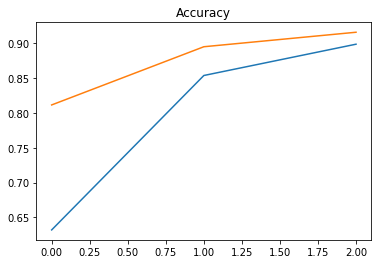

In [13]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()


In [14]:
model.get_config()

{'layers': [{'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 28, 28, 1),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3, 3),
    'name': 'conv2d',
    'padding': 'valid',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': False}},
  {'class_name': 'MaxPooling2D',
   'config': {'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'max_pooling2d',
    'padding': 'valid',
    'pool_size': (2, 2),
    'strides': (2, 2),
    'trainable': True}},
  {'class_name': 'Flatten',
   'config': {'data_format': 'channels_last',
    'dtype': 'float3

In [15]:
l=model.get_weights()
kernel=l[0].reshape((3,3))
kernel

array([[ 0.0123274 ,  0.0211142 ,  0.02429151],
       [-0.03324536, -0.02649688,  0.04217457],
       [-0.20945549, -0.02518369, -0.04110754]], dtype=float32)

In [0]:
def conv(m,k):
  return (m*k).sum()

In [17]:
img=X_train[911].reshape((28,28))
m,n=img.shape
mk,nk=kernel.shape
img_conv=np.zeros((m-mk+1,n-nk+1))
img_conv.shape,y_train[911]

((26, 26), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [18]:
mc,nc=img_conv.shape
for i in range(mc):
  for j in range(nc):
    img_conv[i,j]=conv(img[i:i+3,j:j+3],kernel)
img_conv

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00

In [0]:
def relu_mat(X):
  m,n=X.shape
  x=X.reshape((m*n,))
  for i in range(len(x)):
    if x[i]<=0:x[i]=0
  return x.reshape((m,n))

In [0]:
def max_pool(M):
  return M.max()

In [0]:
img_conv=relu_mat(img_conv)

In [0]:
mc,nc=img_conv.shape
mpool,npool=2,2 #pooling size, stride 2
pooled=np.zeros((mc//mpool,nc//npool))
pl,pc=pooled.shape

In [0]:
for i in range(pl):
  for j in range(pc):
    pooled[i,j]=max_pool(img_conv[i*2:i*2+2,j*2:j*2+2])

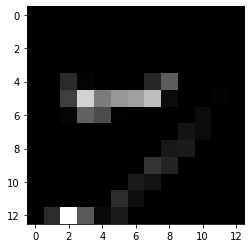

In [24]:
#visualização da imagem antes e após conv+relu+pooling
plt.imshow(pooled)
